In [25]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
TRAINING_DIR = "D:\Fire-vs-NoFire\Fire-vs-NoFire\Training\Training"
training_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip=True,
                                  height_shift_range=0.5,
                                  zoom_range=[0.5,1.0],
                                  brightness_range=[0.2,1.0])
VALIDATION_DIR = "D:\Fire-vs-NoFire\Fire-vs-NoFire\Test\Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                         target_size=(224,224),
                                         class_mode='binary',
                                         batch_size = 32)
validation_generator = validation_datagen.flow_from_directory(      
                                           VALIDATION_DIR,
                                           target_size=(224,224),
                                            class_mode='binary',
                                           batch_size= 32)


Found 39375 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [27]:
from tensorflow.keras.optimizers import Adam

# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential([
    
    # Step 1 - Convolution
tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[224, 224, 3]),
    # Step 2 - Pooling
tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    # Adding a second convolutional layer
tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    # Step 3 - Flattening
tf.keras.layers.Flatten(),
    
# Step 4 - Full Connection
tf.keras.layers.Dense(units=128, activation='relu'),
    
    # Step 5 - Output Layer
## For Binary Classification
# tf.keras.layers.Dense(units=1, activation='sigmoid')
tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')])


In [28]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(loss='hinge',
optimizer=Adam(lr=0.0001),
metrics=['acc'])
# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(
train_generator,
    steps_per_epoch=250,
epochs = 15,
validation_data = validation_generator,
)

Epoch 1/15
 57/250 [=====>........................] - ETA: 8:02 - loss: 0.1061 - acc: 0.9516

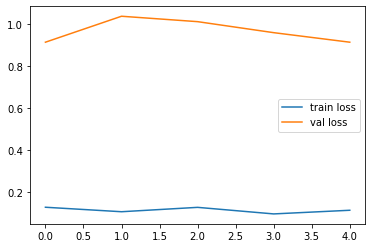

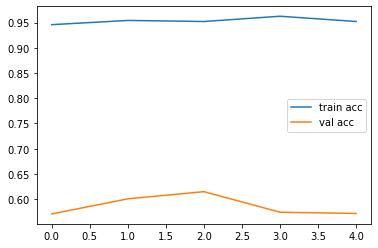

<Figure size 432x288 with 0 Axes>

In [36]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [122]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rfire_no_fire.h5')

In [123]:
from tensorflow.keras.models import load_model
 
# load model
saved_model = load_model('model_rfire_no_fire.h5')

In [124]:
saved_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               262272    
_________________________________________________________________
dense_38 (Dense)             (None, 1)               

In [125]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('D:/Fire-vs-NoFire/Fire-vs-NoFire/Test/Test/No_Fire/resized_test_nofire_frame0.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [126]:
result

array([[3.7670784]], dtype=float32)

In [127]:
if result[0]<0:
    print("The image classified is fire")
else:
    print("The image classified is No Fire")

The image classified is No Fire
